In [30]:
!pip install pandas

In [5]:
from tabulate import tabulate

In [20]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sqlite3

In [33]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [34]:
table_name = 'churn-table'

In [9]:
conn = sqlite3.connect('churn-database.db')

In [10]:
# Write the DataFrame to the database as a table
df.to_sql('churn-table', conn, index=False)

ValueError: Table 'churn-table' already exists.

In [36]:
# Query to calculate the overall churn rate
query = '''
SELECT (SUM(Exited) * 1.0 / COUNT(*)) AS churn_rate
FROM "churn-table"
'''

In [37]:
cursor = conn.execute(query)

In [38]:
# Fetch the result
result = cursor.fetchone()
churn_rate = result[0]

In [39]:
# Close the database connection
conn.close()

In [40]:
# Print the churn rate
print("Overall churn rate: {:.2%}".format(churn_rate))

Overall churn rate: 20.38%


In [50]:
conn = sqlite3.connect('churn-database.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute the SQL query
query = '''
SELECT Geography, Gender, Age, 
       COUNT(CASE WHEN Exited = 1 THEN 1 END) AS churned_customers,
       COUNT(*) AS total_customers,
       1.0 * COUNT(CASE WHEN Exited = 1 THEN 1 END) / COUNT(*) AS churn_rate
FROM "churn-table"
GROUP BY Geography, Gender, Age;
'''
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Format the results as a table
table = tabulate(results, headers=column_names, tablefmt="pretty")

# Print the table
print(table)



+-----------+--------+-----+-------------------+-----------------+----------------------+
| Geography | Gender | Age | churned_customers | total_customers |      churn_rate      |
+-----------+--------+-----+-------------------+-----------------+----------------------+
|  France   | Female | 18  |         0         |        2        |         0.0          |
|  France   | Female | 19  |         0         |        3        |         0.0          |
|  France   | Female | 20  |         0         |        8        |         0.0          |
|  France   | Female | 21  |         0         |       20        |         0.0          |
|  France   | Female | 22  |         1         |       22        | 0.045454545454545456 |
|  France   | Female | 23  |         1         |       16        |        0.0625        |
|  France   | Female | 24  |         3         |       36        | 0.08333333333333333  |
|  France   | Female | 25  |         1         |       30        | 0.03333333333333333  |
|  France 

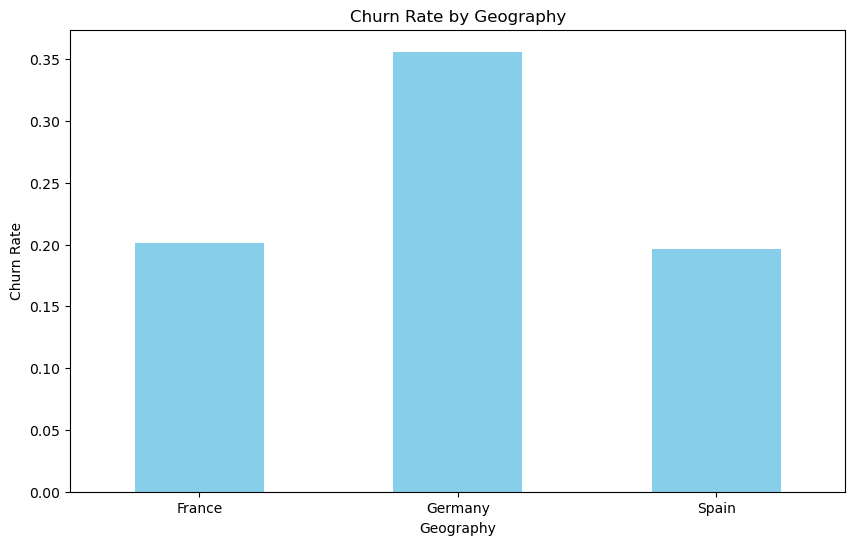

In [53]:
df = pd.read_sql_query(query, conn)

# Create a bar plot of churn rate by geography
plt.figure(figsize=(10, 6))
df.groupby('Geography')['churn_rate'].mean().plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

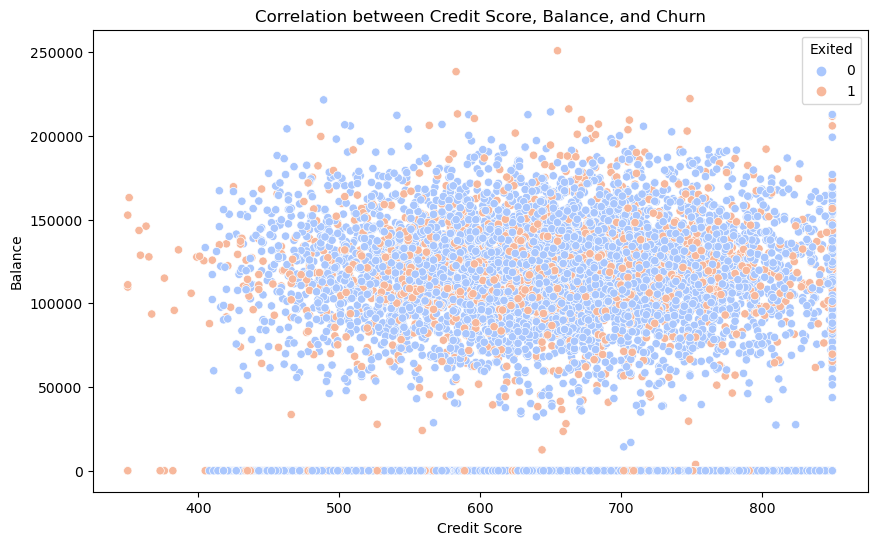

Correlation Matrix:
             CreditScore    Tenure   Balance    Exited
CreditScore     1.000000  0.000842  0.006268 -0.026771
Tenure          0.000842  1.000000 -0.012254 -0.013656
Balance         0.006268 -0.012254  1.000000  0.118577
Exited         -0.026771 -0.013656  0.118577  1.000000


In [56]:
query = '''
SELECT CreditScore, Tenure, Balance, Exited
FROM "churn-table"
'''
df = pd.read_sql_query(query, conn)

# Generate a scatter plot with color-coded churn status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CreditScore', y='Balance', hue='Exited', palette='coolwarm')
plt.title('Correlation between Credit Score, Balance, and Churn')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.show()

# Calculate correlation matrix
correlation_matrix = df[['CreditScore', 'Tenure', 'Balance', 'Exited']].corr()

# Display the correlation matrix as a table
print('Correlation Matrix:')
print(correlation_matrix)

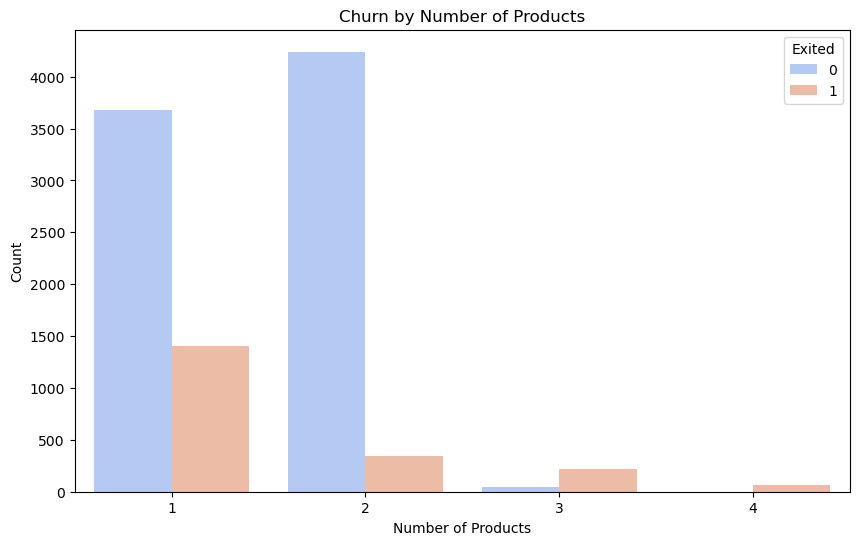

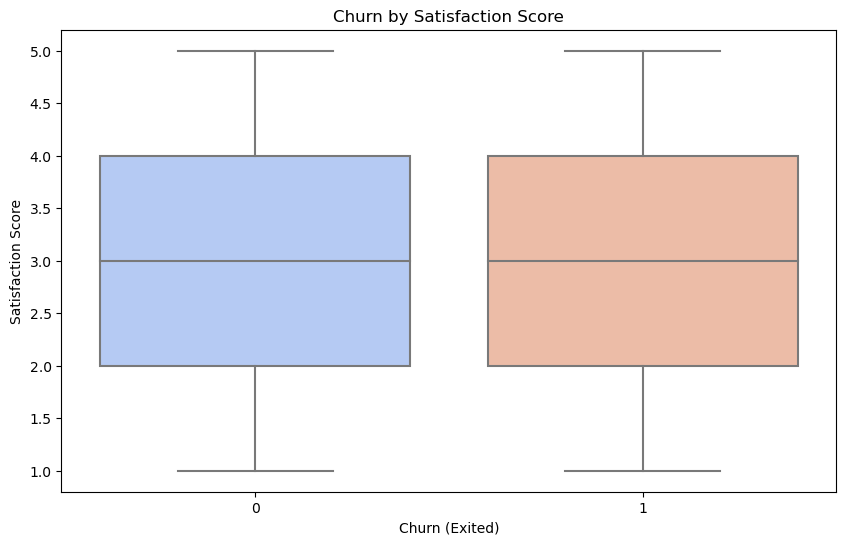

Churn Rate by Number of Products and Satisfaction Score:
    NumOfProducts  Satisfaction Score    Exited
0               1                   1  0.275720
1               1                   2  0.312127
2               1                   3  0.265625
3               1                   4  0.281071
4               1                   5  0.251931
5               2                   1  0.074362
6               2                   2  0.071050
7               2                   3  0.072632
8               2                   4  0.078977
9               2                   5  0.083612
10              3                   1  0.844444
11              3                   2  0.860000
12              3                   3  0.864407
13              3                   4  0.720000
14              3                   5  0.838710
15              4                   1  1.000000
16              4                   2  1.000000
17              4                   3  1.000000
18              4              

In [61]:
# Execute the SQL query and load the results into a DataFrame
query = '''
SELECT NumOfProducts, "Satisfaction Score", Exited
FROM "churn-table"
'''
df = pd.read_sql_query(query, conn)

# Create a countplot to visualize churn by number of products
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='coolwarm')
plt.title('Churn by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

# Create a boxplot to visualize churn by satisfaction score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exited', y='Satisfaction Score', palette='coolwarm')
plt.title('Churn by Satisfaction Score')
plt.xlabel('Churn (Exited)')
plt.ylabel('Satisfaction Score')
plt.show()

# Calculate churn rate by number of products and satisfaction score
churn_rate_table = df.groupby(['NumOfProducts', 'Satisfaction Score'])['Exited'].mean().reset_index()

# Display the churn rate table
print('Churn Rate by Number of Products and Satisfaction Score:')
print(churn_rate_table)

Churn Rates by Credit Card Status:
   HasCrCard  churn_rate
0          0    0.208149
1          1    0.201984


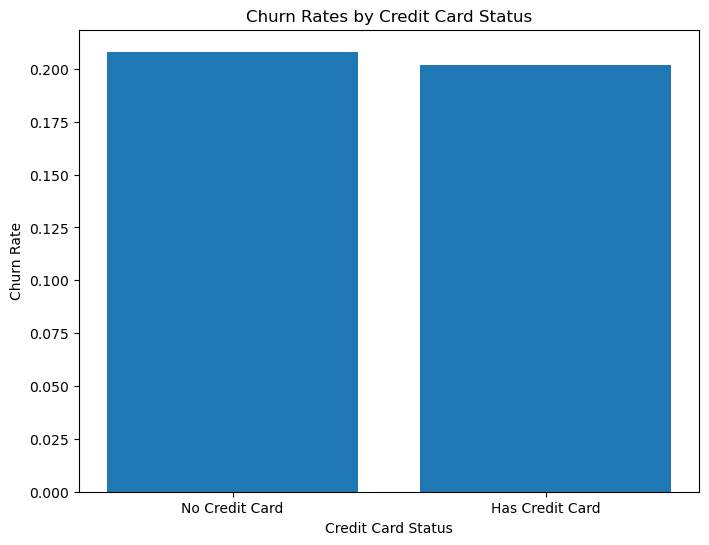

In [11]:
query = '''
SELECT HasCrCard, AVG(Exited) AS churn_rate
FROM "churn-table"
GROUP BY HasCrCard;
'''
df = pd.read_sql_query(query, conn)

# Print the churn rate by credit card status
print('Churn Rates by Credit Card Status:')
print(df)

# Create a bar plot to visualize the churn rates
plt.figure(figsize=(8, 6))
plt.bar(df['HasCrCard'], df['churn_rate'])
plt.xlabel('Credit Card Status')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Credit Card Status')
plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'])
plt.show()

Churn Rates by Active Member Status:
   IsActiveMember  churn_rate
0               0    0.268715
1               1    0.142691


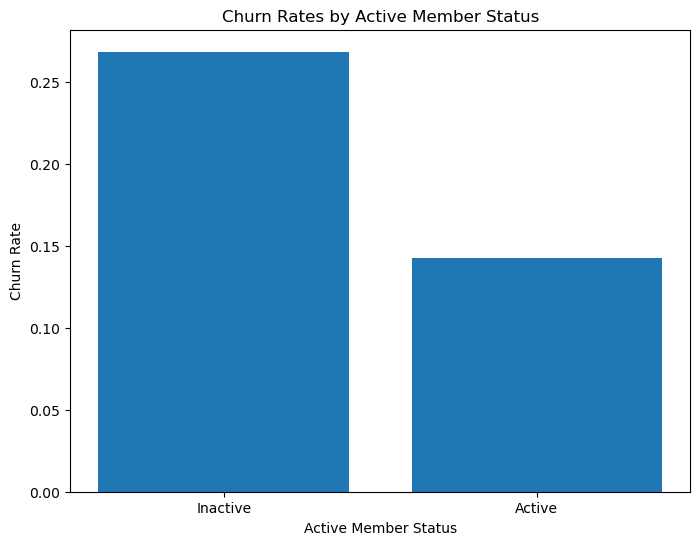

In [12]:
# Execute the SQL query and load the results into a DataFrame
query = '''
SELECT IsActiveMember, AVG(Exited) AS churn_rate
FROM "churn-table"
GROUP BY IsActiveMember;
'''
df = pd.read_sql_query(query, conn)

# Print the churn rates by active member status
print('Churn Rates by Active Member Status:')
print(df)

# Create a bar plot to visualize the churn rates
plt.figure(figsize=(8, 6))
plt.bar(df['IsActiveMember'], df['churn_rate'])
plt.xlabel('Active Member Status')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Active Member Status')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

Churn Rates and Average Salary by Salary Range:
    churn_rate     avg_salary
0     0.159091    2488.646629
1     0.222222   10044.820556
2     0.197002   19974.422869
3     0.225549   29886.838563
4     0.182008   39909.546234
5     0.194444   50014.808571
6     0.202677   59947.057170
7     0.218437   70016.727856
8     0.166031   80089.524771
9     0.217143   90169.876514
10    0.177291  100301.480279
11    0.205761  109924.213128
12    0.205128  119899.549191
13    0.203125  129909.410527
14    0.211577  140020.662395
15    0.193814  149754.371814
16    0.213115  160178.542664
17    0.219262  170131.058340
18    0.233270  179862.449484
19    0.229167  190168.620708
20    0.163424  197598.303619


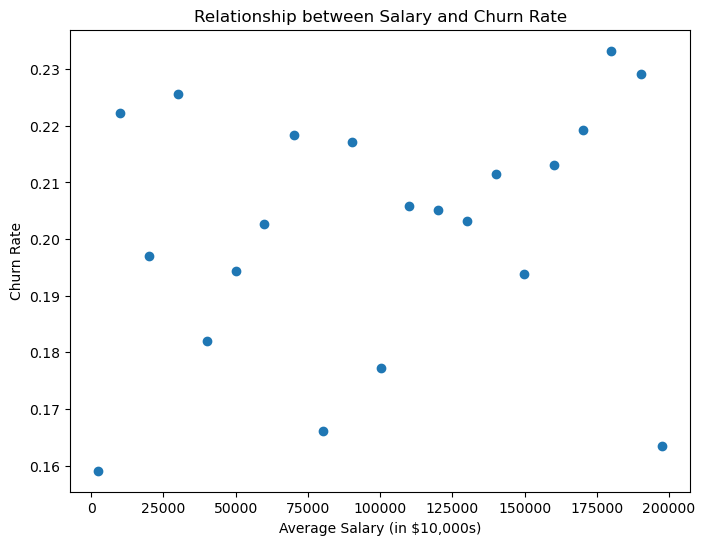

In [13]:

# Execute the SQL query and load the results into a DataFrame
query = '''
SELECT AVG(Exited) AS churn_rate, AVG(EstimatedSalary) AS avg_salary
FROM "churn-table"
GROUP BY ROUND(EstimatedSalary / 10000);
'''
df = pd.read_sql_query(query, conn)

# Print the churn rates and average salary by salary range
print('Churn Rates and Average Salary by Salary Range:')
print(df)

# Create a scatter plot to visualize the relationship between salary and churn rate
plt.figure(figsize=(8, 6))
plt.scatter(df['avg_salary'], df['churn_rate'])
plt.xlabel('Average Salary (in $10,000s)')
plt.ylabel('Churn Rate')
plt.title('Relationship between Salary and Churn Rate')
plt.show()

Association between Customer Complaints and Churn:
   Complain  churn_rate
0         0    0.000503
1         1    0.995108


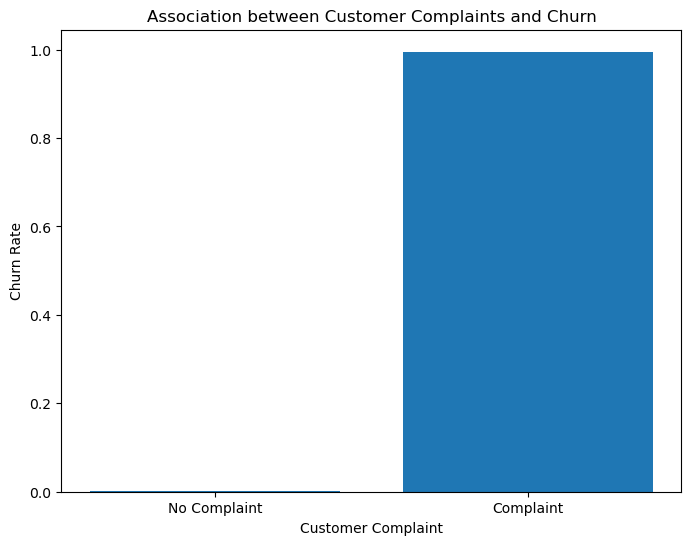

In [15]:
# Execute the SQL query and load the results into a DataFrame
query = '''
SELECT Complain, AVG(Exited) AS churn_rate
FROM "churn-table"
GROUP BY Complain;
'''
df = pd.read_sql_query(query, conn)

# Print the association between customer complaints and churn
print('Association between Customer Complaints and Churn:')
print(df)

# Create a bar plot to visualize the churn rates for customers with and without complaints
plt.figure(figsize=(8, 6))
plt.bar(df['Complain'], df['churn_rate'])
plt.xlabel('Customer Complaint')
plt.ylabel('Churn Rate')
plt.title('Association between Customer Complaints and Churn')
plt.xticks([0, 1], ['No Complaint', 'Complaint'])
plt.show()

Impact of Card Type and Points Earned on Customer Churn:
     Card Type  Point Earned  churn_rate
0      DIAMOND           219    0.666667
1      DIAMOND           220    0.333333
2      DIAMOND           221    0.000000
3      DIAMOND           222    0.333333
4      DIAMOND           223    0.333333
...        ...           ...         ...
2997    SILVER           995    0.000000
2998    SILVER           996    0.000000
2999    SILVER           997    0.500000
3000    SILVER           998    0.000000
3001    SILVER          1000    0.000000

[3002 rows x 3 columns]


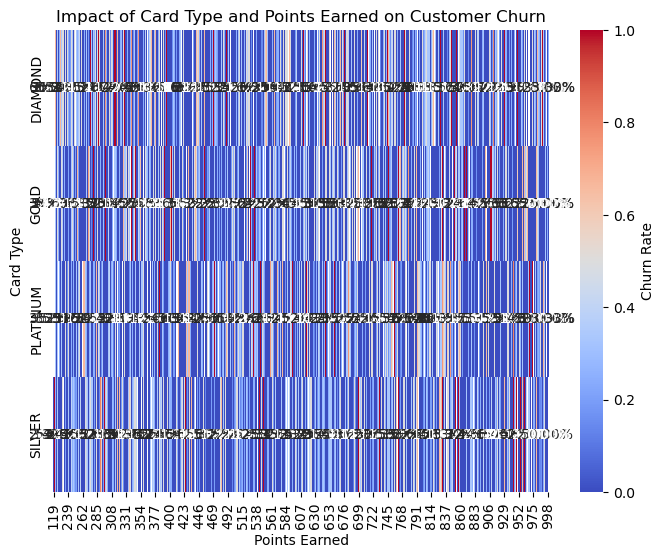

In [21]:

# Execute the SQL query and load the results into a DataFrame
query = '''
SELECT "Card Type", "Point Earned", AVG(Exited) AS churn_rate
FROM "churn-table"
GROUP BY "Card Type", "Point Earned";
'''
df = pd.read_sql_query(query, conn)


# Print the impact of card type and points earned on customer churn
print('Impact of Card Type and Points Earned on Customer Churn:')
print(df)

# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot("Card Type", "Point Earned", "churn_rate")

# Create a heatmap to visualize the churn rates based on card type and points earned
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2%', cbar_kws={'label': 'Churn Rate'})
plt.xlabel('Points Earned')
plt.ylabel('Card Type')
plt.title('Impact of Card Type and Points Earned on Customer Churn')
plt.show()